# 2-2. 正則化をしよう！
正則化とは過学習を避ける手法です。具体的には、パラメーターを推定するときに、誤差だけではなくパラメーター自体の大きさも小さくしようとします。この追加する項を正則化項（ペナルティー）といい、正則化項にかかる係数を正則化パラメーター（α）といいます。αが0だと正則化の効果はありません。

よく使われる正則化項は、以下のものがあります。

L2ペナルティー：パラメーターの二乗の和。Ridge（リッジ）回帰で使われます。
L1ペナルティー：パラメーターの絶対値の和。Lasso（ラッソ）で使われます。
L1とL2ペナルティー：L1ペナルティーとL2ペナルティーの重み和。Elastic Net（エラスティックネット）で使われます。

In [1]:
%matplotlib inline
import pandas as pd, matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
X, y = load_boston(True)  # ボストン市の住宅価格データ

In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

# Ridge(L2回帰）

In [4]:
# 線形回帰
lr = LinearRegression()
lr.fit(X_train, y_train)

# Ridge回帰
ridge = Ridge(alpha = 1)
ridge.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [5]:
# 線形回帰の予測
y_pred1 = lr.predict(X_test)
# 線形回帰の評価
score1 = r2_score(y_test, y_pred1)

# Ridge回帰の予測
y_pred2 = ridge.predict(X_test)
# Ridge回帰の評価
score2 = r2_score(y_test, y_pred2)
score1, score2

(0.6353620786674616, 0.6265116223767426)

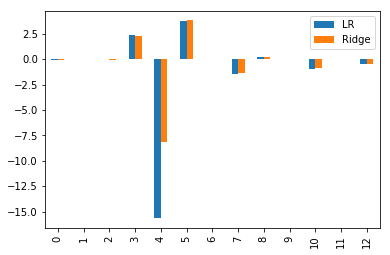

In [6]:
# パラメーターの比較
df = pd.DataFrame({'LR': lr.coef_, 'Ridge': ridge.coef_})
df.plot.bar();

※Ridge回帰の正則化パラメーターαによって結果は変わります。
デフォルトは1ですが、事前に決めるのは難しいです。実際に使うときは、値を変えて結果を確認しながら決めるとよいでしょう。

# Lasso(L1)とElastic Net(L1 + L2)

In [7]:
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

In [8]:
lasso = Lasso(alpha = 1.0)
lasso.fit(X_train, y_train)

enet = ElasticNet(alpha=1, l1_ratio = 0.5)
enet.fit(X_train, y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [9]:
# Lassoの予測
y_pred3 = lasso.predict(X_test)
# Lassoの評価
score3 = r2_score(y_test, y_pred3)

# Elastic Netの予測
y_pred4 = enet.predict(X_test)
# Elastic Netの評価
score4 = r2_score(y_test, y_pred4)
score3, score4

(0.5515110936187517, 0.5601931808168015)

In [10]:
lasso.coef_

array([-0.05921813,  0.05001375, -0.00155282,  0.        , -0.        ,
        0.75853268,  0.01305146, -0.71049912,  0.19577234, -0.01414816,
       -0.80558201,  0.00715616, -0.74231187])

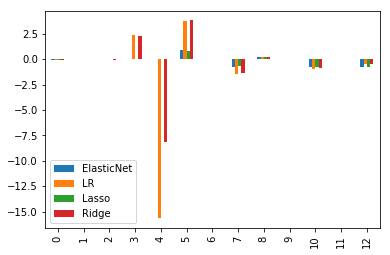

In [11]:
# パラメーターの比較
df = pd.DataFrame({'LR': lr.coef_,
                   'Ridge': ridge.coef_,
                   'Lasso': lasso.coef_,
                   'ElasticNet': enet.coef_})
df.plot.bar();

Lasso（sklearn.linear_model.Lasso）とElastic Net（sklearn.linear_model.ElasticNet）を作成しフィッティングします。
どちらもalphaを指定できます。また、ElasticNetは、l1_ratioを指定できます。
l1_ratioは、L1正則化の比率で、0〜1の値を指定します。

l1_ratio == 0：L2ペナルティーだけを意味し、Ridge回帰に近くなります。
l1_ratio == 1：L1ペナルティーだけになるので、Lassoと同じになります。
決定係数の値はほぼ変わりません。
線形回帰とRidge回帰の決定係数は、0.63前後あったので、それよりは悪くなっています。

lasso.coef_を確認すると、0になっているものが2つあります。Lassoの特徴として「説明変数のパラメーターが0になりやすい」というのがあります（説明変数を減らせます）。

パラメーターがどう変わったかを棒グラフで確認します。
線形回帰とRidge回帰に比べると、全体的に小さくなっているのがわかります。

## Elastic Netのalphaとl1_ratioを変えて、決定係数がどのように変わるか、確認します。

In [13]:
# ElasticNet
enet0 = ElasticNet(alpha = 0)
enet0.fit(X_train, y_train)
y_pred0 = enet0.predict(X_test)
score0 = r2_score(y_test, y_pred0)
score0, score1

C:\Users\ryosuke.nishioka\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ryosuke.nishioka\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
C:\Users\ryosuke.nishioka\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(0.6353620786674623, 0.6353620786674616)

In [14]:
# Elastic Net
enet5 = ElasticNet(alpha=1, l1_ratio=0)
enet5.fit(X_train, y_train)
y_pred5 = enet5.predict(X_test)
score5 = r2_score(y_test, y_pred5)
score5, score2  # Ridge回帰と比較

C:\Users\ryosuke.nishioka\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
C:\Users\ryosuke.nishioka\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(0.5660000880288876, 0.6265116223767426)

In [15]:
# Elastic Net
enet6 = ElasticNet(alpha=1, l1_ratio=1)
enet6.fit(X_train, y_train)
y_pred6 = enet6.predict(X_test)
score6 = r2_score(y_test, y_pred6)
score6, score3

(0.5515110936187517, 0.5515110936187517)

Ridge回帰、Lasso、Elastic Netでは、αで正則化の強さを制御します。α＝0だと線形回帰と同じになります。

ElasticNet(alpha=0)で確認すると、前々問でLinearRegression()の決定係数とほぼ同じになります。
ただし、「α＝0にするなら、LinearRegressionを使って下さい」という警告が出ています。確かに実用上はα＝０で実行する意味はないでしょう。

ElasticNet(alpha=1, l1_ratio=0)は、Ridge(alpha=1)に近いはずです。
しかし、決定係数を比較すると、0.57と0.63でそこそこ違います。「目的変数が収束していません。αが小さすぎると精度の問題があります」と警告が出ています。l1_ratioを小さくすると、結果的にαも小さくなるためです。l1_ratioを小さくしたいときは、Ridge回帰を使った方がよいでしょう。

ElasticNet(alpha=1, l1_ratio=1)で確認すると、Lasso(alpha=1)の決定係数と同じになることが確認できます。

## 問題
説明変数Xと目的変数yに対して、αを変えながら、Elastic Netで回帰分析を行い、決定係数と平均二乗誤差を求めてください。
データは、トレーニングデータとテストデータに分けてください。
αを[0.5, 0.8, 1]としたときに、決定係数のリストを変数r2_listに、平均二乗誤差のリストを変数mse_listに入れてください。

In [16]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
X, y = load_boston(True)  # ボストン市の住宅価格データ
r2_list, mse_list = [], []

In [17]:
X_train, X_test, y_train, y_test = (
    train_test_split(X, y, random_state=0))

In [18]:
for alpha in [0.5, 0.8, 1]:
    enet = ElasticNet(alpha, l1_ratio = 0.5, random_state=0)
    y_pred = enet.fit(X_train, y_train).predict(X_test)
    r2_list.append(r2_score(y_test, y_pred))
    mse_list.append(mean_squared_error(y_test, y_pred))
    
r2_list, mse_list

([0.5818144849721846, 0.5681740492360176, 0.5601931808168015],
 [34.16534484821838, 35.27975501800896, 35.93178411019938])